In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
import random as rnd
import pandas as pd

In [2]:
prior_rand = np.random.uniform(0.4,0.5)
Prior_prob = np.array([prior_rand,1-prior_rand])
print(Prior_prob)

[0.45836553 0.54163447]


In [3]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))


In [4]:
mean1 = np.random.uniform(-1,1,2)
rand_cov1_1 = np.random.uniform(-1,1)
rand_cov1_2 = np.random.uniform(-1,1)
rand_cov1_3 = np.random.uniform(-1,1)
rand_cov1_4 = np.random.uniform(-1,1)

cov1 = [[rand_cov1_3, rand_cov1_1], [rand_cov1_1, rand_cov1_4]]
cov1 = np.dot(cov1,np.transpose(cov1))
print(cov1)

mean2 = np.random.uniform(-1,1,2)
rand_cov1_1 = np.random.uniform(0,1)
rand_cov1_2 = np.random.uniform(0,1)
rand_cov1_3 = np.random.uniform(-1,1)
rand_cov1_4 = np.random.uniform(-1,1)


cov2 = [[rand_cov1_3, rand_cov1_1], [rand_cov1_2, rand_cov1_4]]
cov2 = np.dot(cov2,np.transpose(cov2))
print(cov2)



[[1.19426692 0.06840575]
 [0.06840575 1.38265851]]
[[0.84136284 0.79435626]
 [0.79435626 0.76485575]]


[[1.17488066 0.83637471]
 [0.83637471 1.17488066]]
[[1.10629931 0.80747738]
 [0.80747738 1.23178605]]
 
 
 
[0.313288 0.686712]

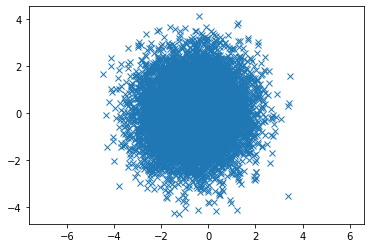

In [5]:
x1, y1 = np.random.multivariate_normal(mean1, cov1,10000).T
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()
#print(x1,y1)

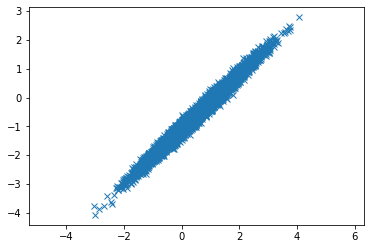

In [6]:
x2, y2 = np.random.multivariate_normal(mean2, cov2, 10000).T
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

In [7]:
class0_samples = []
class1_samples = []

for i in range(1000):
    temp1 = np.random.uniform(0,1)
    if temp1 <= Prior_prob[0]:
        sample = np.random.multivariate_normal(mean1,cov1,1).T
        class0_samples.append(sample)
    else:
        sample = np.random.multivariate_normal(mean2,cov2,1).T
        class1_samples.append(sample) 
class0_final = np.array(class0_samples)
class1_final = np.array(class1_samples)
print(np.shape(class0_final),np.shape(class1_final))
lable_0 = np.zeros((np.shape(class0_final)[0],1))
lable_1 = np.ones((np.shape(class1_final)[0],1))
lable = np.vstack((lable_0,lable_1))
class_final = np.vstack((class0_final[:,:,0],class1_final[:,:,0]))
print(np.shape(lable))
print(np.shape(class_final))

(458, 2, 1) (542, 2, 1)
(1000, 1)
(1000, 2)


In [8]:
#print(class0_final[:,0,0])

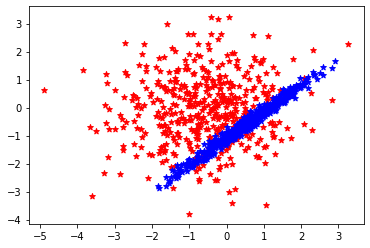

-1.8316708331068865


In [9]:
plt.scatter(class0_final[:,0,0],class0_final[:,1,0],marker='*',color='red')
plt.scatter(class1_final[:,0,0],class1_final[:,1,0],marker='*',color='blue')
plt.show()
print(min(class1_final[:,0,0]))

In [10]:
#PREDICTION
classify_0 = []
classify_1 = []
ratio_right = Prior_prob[0]/Prior_prob[1]
count = 0

for i in class0_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_0.append(1)
    else:
        classify_0.append(0)
        count +=1
        
for i in class1_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_1.append(1)
    else:
        classify_1.append(0)
        
        
classify_0 = np.reshape(classify_0,(np.shape(classify_0)[0],1))
classify_1 = np.reshape(classify_1,(np.shape(classify_1)[0],1))
classify = np.vstack((classify_0,classify_1))
print(np.shape(classify))

(1000, 1)


In [11]:
df = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify[:,0]})

In [12]:
df.tail()

,x,y,label,classify
995,0.731043,-0.444032,1.0,1
996,1.282062,0.249788,1.0,1
997,0.959450,-0.231492,1.0,1
998,1.132451,-0.064087,1.0,1
999,-0.387661,-1.366383,1.0,1


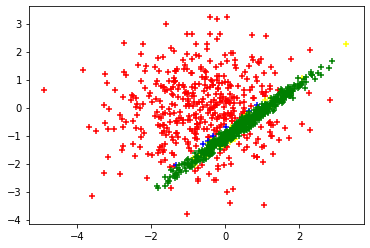

In [13]:
#plt.scatter(df[df['label']==0 and df['classify']==0])
ind = np.where((df['label']==0) & (df['classify']==0))
plt.scatter(df.loc[ind]['x'],df.loc[ind]['y'], marker='+',color = 'red')
ind = np.where((df['label']==0) & (df['classify']==1))
plt.scatter(df.loc[ind]['x'],df.loc[ind]['y'], marker='+',color = 'yellow')
ind = np.where((df['label']==1) & (df['classify']==0))
plt.scatter(df.loc[ind]['x'],df.loc[ind]['y'], marker='+',color = 'blue')
ind = np.where((df['label']==1) & (df['classify']==1))
plt.scatter(df.loc[ind]['x'],df.loc[ind]['y'], marker='+',color = 'green')